In [2]:
#Took from lesson 3.05-lesson-feature-engineering
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.dummy import DummyRegressor # high bias model
%matplotlib inline

In [3]:
home_test = pd.read_csv('datasets/test.csv')
home_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
home_train = pd.read_csv('datasets/train.csv')
home_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
home_test.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [5]:
home_test.isnull().sum().sum()

4171

In [6]:
home_train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [7]:
home_train.isnull().sum().sum()

9822

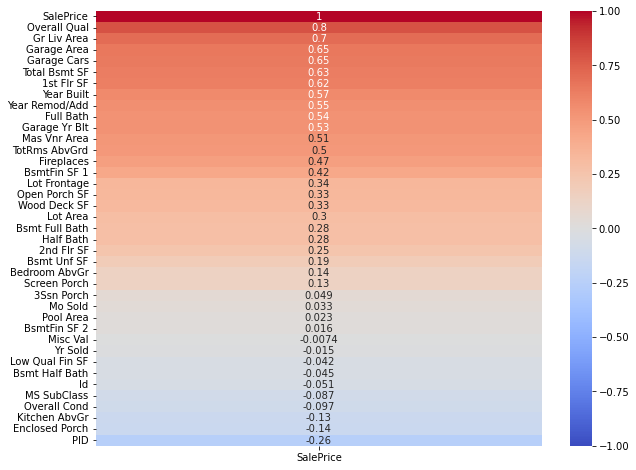

In [8]:
#Based on Breakfast hour Thursday the 9th
plt.figure(figsize=(10,8))
sns.heatmap(home_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [9]:
home_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [10]:
home_train['Garage Area'].isnull().sum()

1

In [11]:
home_train[home_train['Garage Area'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [12]:
#Take from https://datagy.io/pandas-drop-columns-rows/
home_train = home_train.drop(home_train[home_train['Id'] == 2237].index)
home_train[home_train['Garage Area'].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [13]:
home_train['Garage Cars'].isnull().sum()

0

In [14]:
home_test['Garage Area'].isnull().sum()

0

In [15]:
home_train['Garage Cars'].isnull().sum()

0

In [16]:
home_train['MS Zoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
2046    RL
2047    RL
2048    RL
2049    RL
2050    RL
Name: MS Zoning, Length: 2050, dtype: object

In [17]:
home_train['MS Zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [18]:
home_array = []

In [19]:
home_array.append('MS Zoning')

In [20]:
home_train['Lot Frontage'].isnull().sum()

330

In [21]:
home_train[home_train['Lot Frontage'] < 0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [22]:
home_train['Lot Frontage'] = home_train['Lot Frontage'].map(lambda x: x if x >= 0 else home_train['Lot Frontage'].mean())
home_train['Lot Frontage'].isnull().sum()

0

In [23]:
home_train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [24]:
home_array.append('Street')

In [25]:
home_train['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [26]:
home_train['Alley'].isnull().sum()

1910

In [27]:
home_train.drop(columns = 'Alley', inplace = True)
home_test.drop(columns = 'Alley', inplace = True)

In [28]:
home_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.066279,13517,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [29]:
home_train['Lot Shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [30]:
home_array.append('Lot Shape')

In [31]:
home_train['Land Contour'].unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [32]:
home_array.append('Land Contour')

In [33]:
home_train['Utilities'].unique()

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [34]:
home_array.append('Utilities')

In [35]:
home_train['Lot Config'].unique()

array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object)

In [36]:
home_array.append('Lot Config')

In [37]:
home_train['Land Slope'].unique()

array(['Gtl', 'Sev', 'Mod'], dtype=object)

In [38]:
home_array.append('Land Slope')

In [39]:
home_train['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [40]:
home_array.append('Neighborhood')

In [41]:
home_train['Condition 1'].unique()

array(['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)

In [42]:
home_array.append('Condition 1')

In [43]:
home_train['Condition 2'].unique()

array(['Norm', 'RRNn', 'Feedr', 'Artery', 'PosA', 'PosN', 'RRAe', 'RRAn'],
      dtype=object)

In [44]:
home_array.append('Condition 2')

In [45]:
home_train['Bldg Type'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [46]:
home_array.append('Bldg Type')

In [47]:
home_train['House Style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

In [48]:
home_array.append('House Style')

In [49]:
home_train['Roof Style'].unique()

array(['Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'], dtype=object)

In [50]:
home_array.append('Roof Style')

In [51]:
home_train['Roof Matl'].unique()

array(['CompShg', 'WdShngl', 'Tar&Grv', 'WdShake', 'Membran', 'ClyTile'],
      dtype=object)

In [52]:
home_array.append('Roof Matl')

In [53]:
home_train['Exterior 1st'].unique()

array(['HdBoard', 'VinylSd', 'Wd Sdng', 'BrkFace', 'Plywood', 'MetalSd',
       'AsbShng', 'CemntBd', 'WdShing', 'Stucco', 'BrkComm', 'Stone',
       'CBlock', 'ImStucc', 'AsphShn'], dtype=object)

In [54]:
home_array.append('Exterior 1st')

In [55]:
home_train['Exterior 2nd'].unique()

array(['Plywood', 'VinylSd', 'Wd Sdng', 'HdBoard', 'MetalSd', 'AsbShng',
       'CmentBd', 'Wd Shng', 'BrkFace', 'Stucco', 'Brk Cmn', 'ImStucc',
       'Stone', 'CBlock', 'AsphShn'], dtype=object)

In [56]:
home_array.append('Exterior 2nd')

In [57]:
home_train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [58]:
home_train['Mas Vnr Type'].isnull().sum()

22

In [59]:
mas_type_array = ['BrkFace', 'None', 'Stone', 'BrkCmn']
home_train['Mas Vnr Type'] = home_train['Mas Vnr Type'].map(lambda x: x if x in mas_type_array else 'None')
home_train['Mas Vnr Type'].isnull().sum()

0

In [60]:
home_array.append('Mas Vnr Type')

In [61]:
home_train['Mas Vnr Area'].isnull().sum()

22

In [62]:
home_train['Mas Vnr Area'] = home_train['Mas Vnr Area'].map(lambda x: x if x > 0 else 0)
home_train['Mas Vnr Area'].isnull().sum()

0

In [63]:
home_test['Mas Vnr Area'].isnull().sum()

1

In [64]:
home_test['Mas Vnr Area'] = home_test['Mas Vnr Area'].map(lambda x: x if x > 0 else 0)
home_test['Mas Vnr Area'].isnull().sum()

0

In [65]:
home_train['Exter Qual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [66]:
home_array.append('Exter Qual')

In [67]:
home_train['Exter Cond'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [68]:
home_array.append('Exter Cond')

In [69]:
home_train['Foundation'].unique()

array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object)

In [70]:
home_array.append('Foundation')

In [71]:
home_train['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [72]:
home_train['Bsmt Qual'].isnull().sum()

55

In [73]:
bsmt_array = ['TA', 'Gd', 'Fa', 'Ex', 'Po']
home_train['Bsmt Qual'] = home_train['Bsmt Qual'].map(lambda x: x if x in bsmt_array else "No bsmt")
home_train['Bsmt Qual'].isnull().sum()

0

In [74]:
home_array.append('Bsmt Qual')

In [75]:
home_train['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [76]:
home_train['Bsmt Cond'].isnull().sum()

55

In [77]:
bsmt_array = ['TA', 'Gd', 'Fa', 'Po', 'Ex']
home_train['Bsmt Cond'] = home_train['Bsmt Cond'].map(lambda x: x if x in bsmt_array else "No bsmt")
home_train['Bsmt Cond'].isnull().sum()

0

In [78]:
home_array.append('Bsmt Cond')

In [79]:
home_train['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [80]:
home_train['Bsmt Exposure'].isnull().sum()

58

In [81]:
bsmt_array = ['No', 'Gd', 'Av', 'Mn']
home_train['Bsmt Exposure'] = home_train['Bsmt Exposure'].map(lambda x: x if x in bsmt_array else "No bsmt")
home_train['Bsmt Exposure'].isnull().sum()

0

In [82]:
home_array.append('Bsmt Exposure')

In [83]:
home_train['BsmtFin Type 1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [84]:
home_train['BsmtFin Type 1'].isnull().sum()

55

In [85]:
bsmt_array = ['GLQ', 'Unf', 'ALQ', 'Rec', 'BLQ', 'LwQ']
home_train['BsmtFin Type 1'] = home_train['BsmtFin Type 1'].map(lambda x: x if x in bsmt_array else "No bsmt")
home_train['BsmtFin Type 1'].isnull().sum()

0

In [86]:
home_array.append('BsmtFin Type 1')

In [87]:
home_train['BsmtFin SF 1'].isnull().sum()

1

In [88]:
home_train[home_train['BsmtFin SF 1'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [89]:
#Take from https://datagy.io/pandas-drop-columns-rows/
home_train = home_train.drop(home_train[home_train['Id'] == 1342].index)
home_train[home_train['BsmtFin SF 1'].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [90]:
home_train['BsmtFin SF 1'].isnull().sum()

0

In [91]:
home_test['BsmtFin SF 1'].isnull().sum()

0

In [92]:
home_train['BsmtFin Type 2'].unique()

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [93]:
home_train['BsmtFin Type 2'].isnull().sum()

55

In [94]:
bsmt_array = ['Unf', 'Rec', 'BLQ', 'GLQ', 'LwQ', 'ALQ']
home_train['BsmtFin Type 2'] = home_train['BsmtFin Type 1'].map(lambda x: x if x in bsmt_array else "No bsmt")
home_train['BsmtFin Type 2'].isnull().sum()

0

In [95]:
home_array.append('BsmtFin Type 2')

In [96]:
home_train['BsmtFin SF 2'].isnull().sum()

0

In [97]:
home_test['BsmtFin SF 2'].isnull().sum()

0

In [98]:
home_train['Bsmt Unf SF'].isnull().sum()

0

In [99]:
home_test['Bsmt Unf SF'].isnull().sum()

0

In [100]:
home_train['Total Bsmt SF'].isnull().sum()

0

In [101]:
home_test['Total Bsmt SF'].isnull().sum()

0

In [102]:
home_train['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW'], dtype=object)

In [103]:
home_array.append('Heating')

In [104]:
home_train['Heating QC'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [105]:
home_array.append('Heating QC')

In [106]:
home_train['Central Air'].unique()

array(['Y', 'N'], dtype=object)

In [107]:
home_train['Central Air'] = home_train['Central Air'].map(lambda x: 1 if x == 'Y' else 0)

In [108]:
home_train['Central Air'].unique()

array([1, 0], dtype=int64)

In [109]:
home_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [110]:
home_array.append('Electrical')

In [111]:
home_train['Bsmt Full Bath'].isnull().sum()

1

In [112]:
home_train[home_train['Bsmt Full Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700


In [113]:
#Take from https://datagy.io/pandas-drop-columns-rows/
home_train = home_train.drop(home_train[home_train['Id'] == 1498].index)
home_train[home_train['Bsmt Full Bath'].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [114]:
home_train['Bsmt Full Bath'].isnull().sum()

0

In [115]:
home_test['Bsmt Full Bath'].isnull().sum()

0

In [116]:
home_train['Bsmt Half Bath'].isnull().sum()

0

In [117]:
home_test['Bsmt Half Bath'].isnull().sum()

0

In [118]:
home_train['Kitchen Qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [119]:
home_array.append('Kitchen Qual')

In [120]:
home_train['Functional'].unique()

array(['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
      dtype=object)

In [121]:
home_array.append('Functional')

In [122]:
home_train['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [123]:
home_train['Fireplace Qu'].isnull().sum()

998

In [124]:
fire_array = ['TA', 'Gd', 'Po', 'Ex', 'Fa']
home_train['Fireplace Qu'] = home_train['Fireplace Qu'].map(lambda x: x if x in fire_array else "No fireplace")
home_train['Fireplace Qu'].isnull().sum()

0

In [125]:
home_array.append('Fireplace Qu')

In [126]:
home_train['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [127]:
home_train['Garage Type'].isnull().sum()

113

In [128]:
garg_array = ['Attchd', 'Detchd', 'BuiltIn', 'Basment', '2Types', 'CarPort']
home_train['Garage Type'] = home_train['Garage Type'].map(lambda x: x if x in garg_array else "No garage")
home_train['Garage Type'].isnull().sum()

0

In [129]:
home_array.append('Garage Type')

In [130]:
home_train['Garage Yr Blt'].isnull().sum()

113

In [131]:
home_train['Garage Yr Blt'] = home_train['Garage Yr Blt'].map(lambda x: x if x > 0 else 0)
home_train['Garage Yr Blt'].isnull().sum()

0

In [132]:
home_test['Garage Yr Blt'].isnull().sum()

45

In [133]:
home_test['Garage Yr Blt'] = home_test['Garage Yr Blt'].map(lambda x: x if x > 0 else 0)
home_test['Garage Yr Blt'].isnull().sum()

0

In [134]:
home_train['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [135]:
home_train['Garage Finish'].isnull().sum()

113

In [136]:
garg_array = ['RFn', 'Unf', 'Fin']
home_train['Garage Finish'] = home_train['Garage Finish'].map(lambda x: x if x in garg_array else "No garage")
home_train['Garage Finish'].isnull().sum()

0

In [137]:
home_array.append('Garage Finish')

In [138]:
home_train['Garage Cars'].isnull().sum()

0

In [139]:
home_train['Garage Area'].isnull().sum()

0

In [140]:
home_train['Garage Qual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [141]:
garg_array = ['TA', 'Fa', 'Gd', 'Ex', 'Po']
home_train['Garage Qual'] = home_train['Garage Qual'].map(lambda x: x if x in garg_array else "No garage")
home_train['Garage Qual'].isnull().sum()

0

In [142]:
home_array.append('Garage Qual')

In [143]:
home_train['Garage Cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [144]:
garg_array = ['TA', 'Fa', 'Po', 'Gd', 'Ex']
home_train['Garage Cond'] = home_train['Garage Cond'].map(lambda x: x if x in garg_array else "No garage")
home_train['Garage Cond'].isnull().sum()

0

In [145]:
home_array.append('Garage Cond')

In [146]:
home_train['Paved Drive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [147]:
home_array.append('Paved Drive')

In [148]:
home_train['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [149]:
pool_array = ['Fa', 'Gd', 'Ex', 'TA']
home_train['Pool QC'] = home_train['Pool QC'].map(lambda x: x if x in pool_array else "No pool")
home_train['Pool QC'].isnull().sum()

0

In [150]:
home_array.append('Pool QC')

In [151]:
home_train['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [152]:
fence_array = ['MnPrv', 'GdPrv', 'GdWo', 'MnWw']
home_train['Fence'] = home_train['Fence'].map(lambda x: x if x in fence_array else "No fence")
home_train['Fence'].isnull().sum()

0

In [153]:
home_array.append('Fence')

In [154]:
home_train['Misc Feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [155]:
misc_array = ['Shed', 'TenC', 'Gar2', 'Othr', 'Elev']
home_train['Misc Feature'] = home_train['Misc Feature'].map(lambda x: x if x in misc_array else "None")
home_train['Misc Feature'].isnull().sum()

0

In [156]:
home_array.append('Misc Feature')

In [157]:
home_train['Sale Type'].unique()

array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
       'ConLw'], dtype=object)

In [158]:
home_array.append('Sale Type')

In [159]:
#Taken inspiration from lesson 3.5
home_train = pd.get_dummies(home_train, columns=home_array, drop_first=True)
home_train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.066279,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.000000,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.000000,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.000000,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.000000,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [160]:
home_test = pd.get_dummies(home_test, columns=home_array, drop_first=False)
home_test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


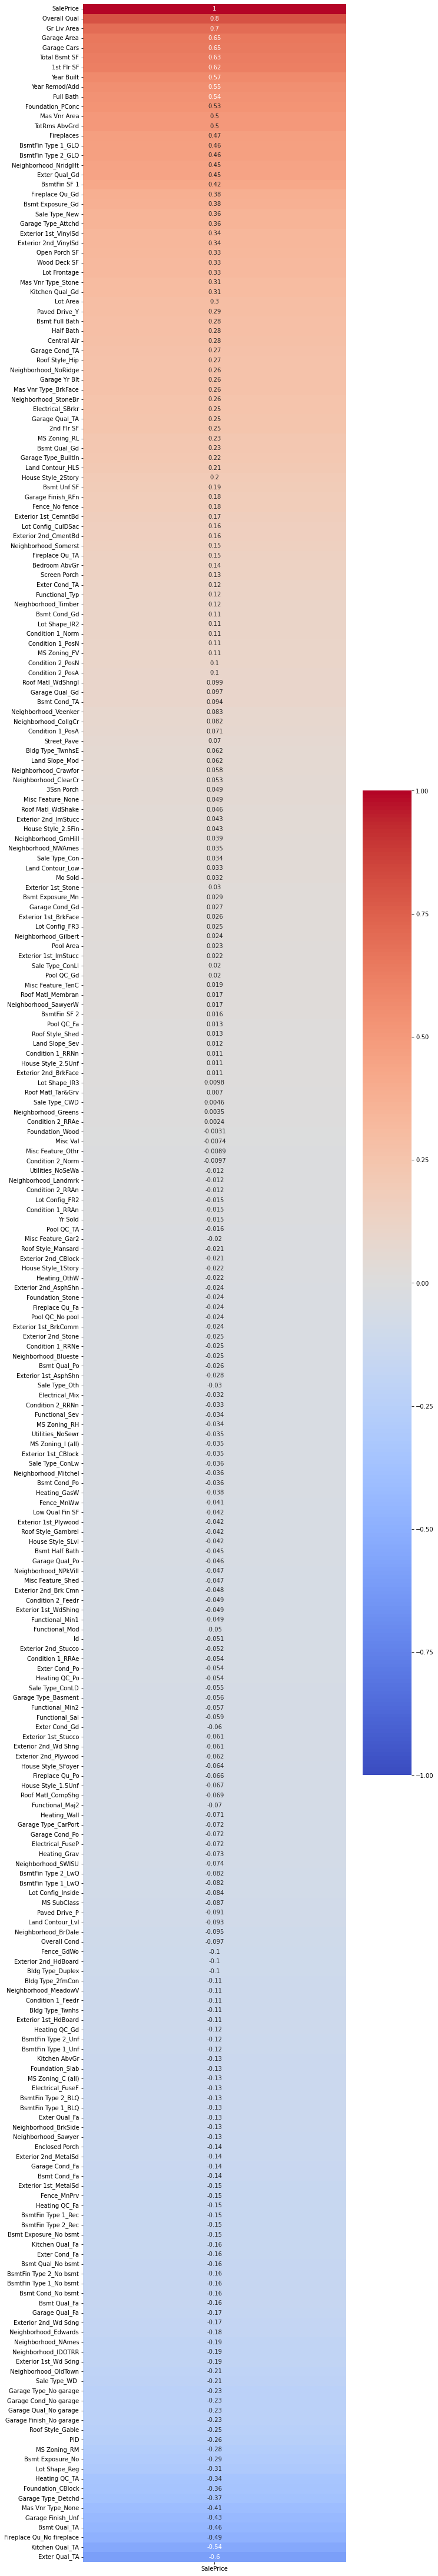

In [161]:
#Based on Breakfast hour Thursday the 9th
plt.figure(figsize=(10,80))
sns.heatmap(home_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [162]:
home_train['Age_of_house'] = 2022 - home_train['Year Built']
home_test['Age_of_house'] = 2022 - home_test['Year Built']
home_train['Years_since_remod'] = 2022 - home_train['Year Remod/Add']
home_test['Years_since_remod'] = 2022 - home_test['Year Remod/Add']
home_train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Age_of_house,Years_since_remod
0,109,533352170,60,69.066279,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,1,46,17
1,544,531379050,60,43.000000,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,1,26,25
2,153,535304180,20,68.000000,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,1,69,15
3,318,916386060,60,73.000000,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,1,16,15
4,255,906425045,50,82.000000,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,1,122,29


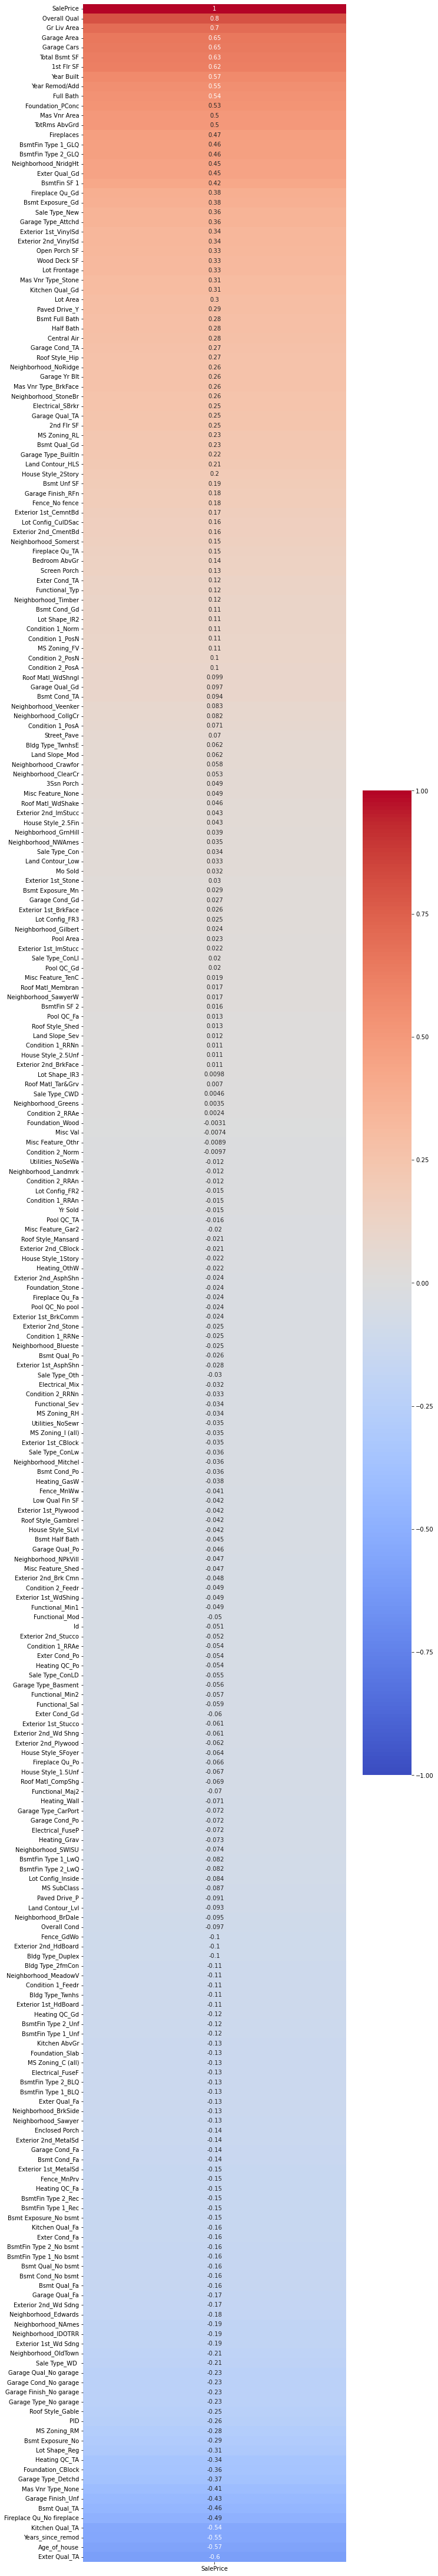

In [163]:
#Based on Breakfast hour Thursday the 9th
plt.figure(figsize=(10,80))
sns.heatmap(home_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [443]:
xvars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA', 'Age_of_house', 'Years_since_remod', 'Full Bath', 'Kitchen Qual_TA', 'Foundation_PConc', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'Bsmt Qual_TA', 'BsmtFin Type 1_GLQ', 'BsmtFin Type 2_GLQ']
#xvars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA']
X = home_train[xvars]
X.head()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Exter Qual_TA,Age_of_house,Years_since_remod,Full Bath,Kitchen Qual_TA,Foundation_PConc,Mas Vnr Area,TotRms AbvGrd,Fireplaces,Bsmt Qual_TA,BsmtFin Type 1_GLQ,BsmtFin Type 2_GLQ
0,6,1479,475.0,2.0,725.0,725,0,46,17,2,0,0,289.0,6,0,1,1,1
1,7,2122,559.0,2.0,913.0,913,0,26,25,2,0,1,132.0,8,1,0,1,1
2,5,1057,246.0,1.0,1057.0,1057,1,69,15,1,0,0,0.0,5,0,1,1,1
3,5,1444,400.0,2.0,384.0,744,1,16,15,2,1,1,0.0,7,0,0,0,0
4,6,1445,484.0,2.0,676.0,831,1,122,29,2,1,1,0.0,6,0,0,0,0


In [6]:
home_train[['Garage Area', 'Garage Cars']].corr()

,Garage Area,Garage Cars
Garage Area,1.00000,0.89318
Garage Cars,0.89318,1.00000


In [444]:
y = home_train['SalePrice']
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [445]:
#From lesson 3.05
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias = False, degree = 2)

In [446]:
X_poly = poly.fit_transform(X)

In [447]:
#from lesson 3.03
#log test
#X_poly = X_poly
#y = y

In [448]:
pd.DataFrame(X, columns = poly.get_feature_names(xvars)).head()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Exter Qual_TA,Age_of_house,Years_since_remod,Full Bath,...,Fireplaces^2,Fireplaces Bsmt Qual_TA,Fireplaces BsmtFin Type 1_GLQ,Fireplaces BsmtFin Type 2_GLQ,Bsmt Qual_TA^2,Bsmt Qual_TA BsmtFin Type 1_GLQ,Bsmt Qual_TA BsmtFin Type 2_GLQ,BsmtFin Type 1_GLQ^2,BsmtFin Type 1_GLQ BsmtFin Type 2_GLQ,BsmtFin Type 2_GLQ^2
0,6,1479,475.0,2.0,725.0,725,0,46,17,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,2122,559.0,2.0,913.0,913,0,26,25,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1057,246.0,1.0,1057.0,1057,1,69,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1444,400.0,2.0,384.0,744,1,16,15,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1445,484.0,2.0,676.0,831,1,122,29,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
poly = PolynomialFeatures(include_bias = False, degree=2)

In [450]:
home_test_poly = poly.fit_transform(home_test[xvars])

In [462]:
'''
m = 0
c = 0
for i in range(1,10000):
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    n = cross_val_score(lr, X_train, y_train, cv = 3).mean()
    if n > m:
        m = n
        c = i
print(c)
'''

'\nm = 0\nc = 0\nfor i in range(1,10000):\n    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=i)\n    lr = LinearRegression()\n    lr.fit(X_train, y_train)\n    n = cross_val_score(lr, X_train, y_train, cv = 3).mean()\n    if n > m:\n        m = n\n        c = i\nprint(c)\n'

In [7]:
#We see that the best random number is 5457
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=5)

NameError: name 'X_poly' is not defined

In [464]:
#From lesson 4.01. Standard scalar
#ss = StandardScaler()
#X_train_sc = ss.fit_transform(X_train)
#X_test_sc = ss.transform(X_test)

In [465]:
lr = LinearRegression()

In [466]:
lr.fit(X_train, y_train)

LinearRegression()

In [467]:
prediction = lr.predict(home_test_poly)

In [468]:
#print(len(prediction))
#print(len(y_test))

In [469]:
home_test['SalePrice'] = prediction

In [8]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Testing R2: {lr.score(X_test, y_test)}')

NameError: name 'lr' is not defined

In [471]:
cross_val_score(lr, X_train, y_train, cv = 3).mean()

0.8968011207782394

In [472]:
lr_submission = home_test[['Id', 'SalePrice']]

In [473]:
lr_submission.head()

,Id,SalePrice
0,2658,166815.520382
1,2718,175475.586898
2,2414,178592.287529
3,1989,128542.543339
4,625,176734.283836


In [476]:
lr_submission.to_csv('kaggle/6_13_submission_try10.csv')

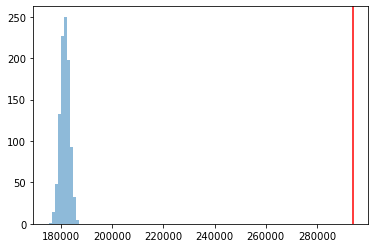

In [475]:
dummy_predictions = []

for i in range(1_000):
    # bootstrap x and y
    X_sample = X.sample(frac = 1.0, replace = True, random_state = i) # bootstrappin
    y_sample = y[X_sample.index]
    
    # create our model
    dummy = DummyRegressor()
    
    # fit the model
    dummy.fit(X_sample, y_sample)
    
    # add predictions on X_test to list
    dummy_prediction = dummy.predict(X_test)[0]
    dummy_predictions.append(dummy_prediction)
    
plt.axvline(y_test.values[0], color = 'r')
plt.hist(dummy_predictions, alpha = .5);

# 

In [ ]:

#Based on Breakfast hour Thursday the 9th
#xvars = ['Overall Qual', 'Gr Liv Area']
#X = home_train[xvars]
#y = home_train['SalePrice']


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [ ]:
#lr = LinearRegression()

In [ ]:
#lr.fit(X_train, y_train)

In [ ]:
#prediction = lr.predict(home_test[xvars])

In [ ]:
#home_test['SalePrice'] = prediction

In [ ]:
#home_test['SalePrice']

In [ ]:
#lr_submission = home_test[['Id', 'SalePrice']]

In [ ]:
#lr_submission.set_index('Id', inplace=True)

In [ ]:
#lr_submission.to_csv('6_9_submission.csv')

In [ ]:
#print(f'Training R2: {lr.score(X_train, y_train)}')
#print(f'Training R2: {lr.score(X_test, y_test)}')

In [ ]:
#cross_val_score(lr, X_train, y_train, cv = 3).mean()